## **Introduction**

We are attempting to find the best neighborhood in Pittsburgh. We chose safety as our metric since other options may not be as important or of constant thought.

#### **Metric**

Our overall metric is safety. This specifically focuses on the submetric of fire incidents in Pittsburgh, specifically the number of building fires. This is important because for a neighborhood to be safe to live in and the best neighborhood, the buildings must be safe.


## **The Best Neighborhood**

In [1]:
import pandas as pd

fire_csv = "https://data.wprdc.org/datastore/dump/8d76ac6b-5ae8-4428-82a4-043130d17b02"
fireinc_data = pd.read_csv(fire_csv) #fire incidents

fireinc_data.head(100)

,_id,call_no,incident_type,type_description,address,alarms,alarm_time,primary_unit,census_tract,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,F160029985,111.0,Building fire,"800 BLOCK CENTER ST, WILKINSBURG PA 15221",1,2016-04-21T05:01:04,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-16,40.441275,-79.882485
1,2,F180022058,111.0,Building fire,"1100 BLOCK JANE ST, WILKINSBURG PA 15221",1,2018-03-13T08:34:43,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-21,40.436342,-79.881003
2,3,F180022102,131.0,Passenger vehicle fire,"SB STATE HWY 28 SB AT 31S, PITTSBURGH PA 15212",0,2018-03-13T11:54:23,231EN32,2406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-1A,NaN,NaN
3,4,F170043431,131.0,Passenger vehicle fire,"1700 BLOCK BELLEAU DR, PITTSBURGH PA 15212",0,2017-05-31T08:39:47,231EN38,2509.0,Fineview,6.0,25.0,4.200325e+10,1.0,25.0,1.0,1-10,40.460303,-80.006980
4,5,F180021111,111.0,Building fire,"2400 BLOCK VILLAGE RD, PITTSBURGH PA 15205",1,2018-03-09T10:26:42,231EN31,2808.0,Fairywood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-16,40.449009,-80.076607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,F180027123,111.0,Building fire,"600 BLOCK LAUGHLIN AVE, PITTSBURGH PA 15210",1,2018-03-31T21:18:56,231EN22,2902.0,Carrick,4.0,29.0,4.200329e+10,4.0,29.0,3.0,4-12,40.404851,-79.979715
96,97,F180026722,151.0,"Outside rubbish, trash or waste fire","2400 BLOCK BURHAM ST, PITTSBURGH PA 15203",0,2018-03-30T10:19:24,231EN22,1608.0,South Side Slopes,3.0,16.0,4.200316e+10,4.0,16.0,3.0,4-22,40.421208,-79.972416
97,98,F180027069,130.0,"Mobile property (vehicle) fire, Other","MURRAY AVE & FORWARD AVE, PITTSBURGH PA 15217",0,2018-03-31T16:50:02,231EN18,1413.0,Squirrel Hill South,5.0,14.0,4.200314e+10,3.0,14.0,4.0,2-21,40.429738,-79.923485
98,99,F180026043,162.0,Outside equipment fire,"FRIENDSHIP AVE & S ATLANTIC, PITTSBURGH PA 15224",0,2018-03-28T07:25:00,231EN08,806.0,Bloomfield,7.0,8.0,4.200308e+10,2.0,8.0,5.0,3-23,40.461996,-79.938951


In [4]:
fire_df = fireinc_data[["neighborhood","type_description"]]
fire_df = fire_df.sort_values("neighborhood", ascending=False)
fire_df.head(100)

,neighborhood,type_description
495,Windgap,Brush or brush-and-grass mixture fire
8872,Windgap,Building fire
9283,Windgap,"Special outside fire, Other"
5295,Windgap,"Outside rubbish, trash or waste fire"
9082,Windgap,Building fire
...,...,...
2452,West Oakland,Brush or brush-and-grass mixture fire
396,West Oakland,"Cooking fire, confined to container"
10422,West Oakland,Brush or brush-and-grass mixture fire
7386,West Oakland,Passenger vehicle fire


In [5]:
query_mask = fire_df["type_description"] == 'Building fire'
Bfire_df = fire_df[query_mask]
Bfire_df.head(100)

,neighborhood,type_description
8872,Windgap,Building fire
9082,Windgap,Building fire
6069,Windgap,Building fire
9976,Windgap,Building fire
6554,Windgap,Building fire
...,...,...
5090,Summer Hill,Building fire
6628,Strip District,Building fire
5637,Strip District,Building fire
7625,Strip District,Building fire


In [6]:
import matplotlib.pyplot as mp
Bfire_df = Bfire_df['neighborhood'].value_counts()
Bfire_df.columns = ["Neighborhood", "IncidentCount"]
Bfire_df = Bfire_df.sort_values(ascending=False)
Bfire_df

neighborhood
Carrick                 99
Knoxville               74
Homewood North          66
Sheraden                64
Homewood South          57
                        ..
Mount Oliver Borough     2
Regent Square            1
St. Clair                1
Glen Hazel               1
New Homestead            1
Name: count, Length: 89, dtype: int64

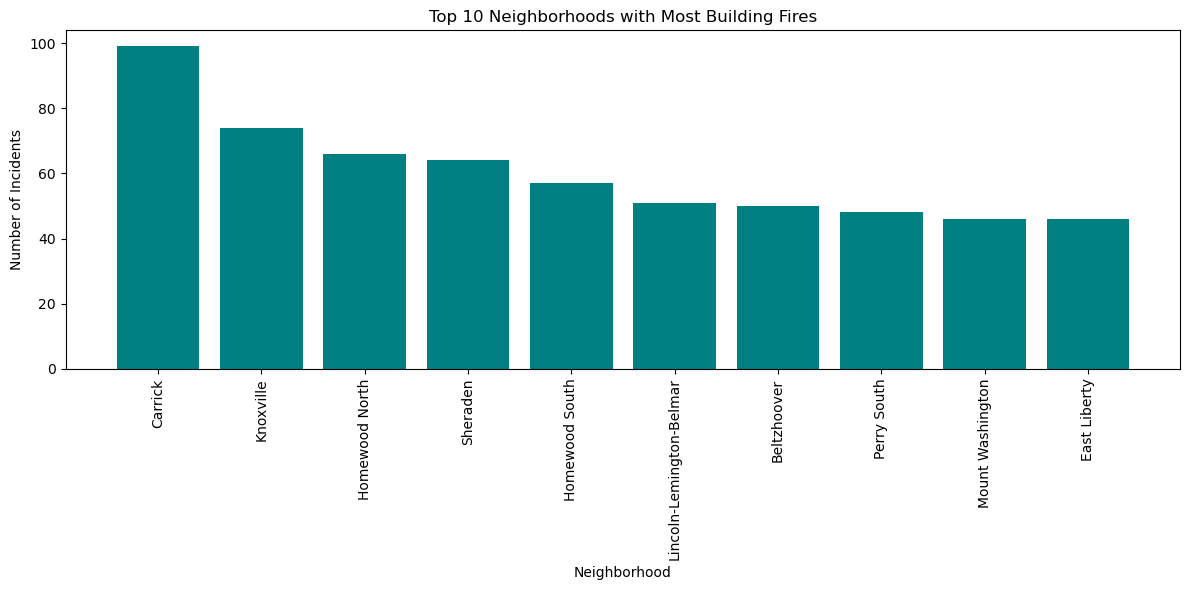


Bottom 10 Neighborhoods:

Regent Square: 1
St. Clair: 1
*** New Homestead: 1 <-- Lowest ***
Glen Hazel: 1
Allegheny Center: 2
Arlington Heights: 2
Mount Oliver Borough: 2
West End: 3
East Carnegie: 3
Friendship: 3
Neighborhood with least Building Fires:  New Homestead


In [7]:
fire_df = fireinc_data[fireinc_data["type_description"] == "Building fire"]["neighborhood"].value_counts().reset_index()
fire_df.columns = ["Neighborhood", "IncidentCount"]
fire_df = fire_df.sort_values("IncidentCount", ascending = False)

leastIncidents = fire_df.iloc[-1]["Neighborhood"]

topTen = fire_df.head(10)

mp.figure(figsize = (12,6))
mp.bar(topTen["Neighborhood"], topTen["IncidentCount"], color = "teal")
mp.xticks(rotation = 90)
mp.xlabel("Neighborhood")
mp.ylabel("Number of Incidents")
mp.title("Top 10 Neighborhoods with Most Building Fires")
mp.tight_layout()
mp.show()

bottomTen = fire_df.tail(10).sort_values("IncidentCount")

print("\nBottom 10 Neighborhoods:\n")
for i, row in bottomTen.iterrows():
    n = row["Neighborhood"]
    c = row["IncidentCount"]
    if n == leastIncidents:
        print(f"*** {n}: {c} <-- Lowest ***")
    else: 
        print(f"{n}: {c}")

print("Neighborhood with least Building Fires: ", leastIncidents)

## **Conclusion**

The neighborhood with the least building fires is New Homestead. This allows us to understand that it is the best neighborhood in terms of fire safety of buildings.